In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# put the dataset that comes from short_dataset_feature_engineering.ipynb 
file_path = '/data/caysar9/results/final_short.csv'
# Load migraine data
print("Loading data...")
df = pd.read_csv(file_path)
df.head()

Loading data...


,query_date,studyid,all_locations,all_triggers,all_relieves,all_aff,gender,age_group,duration_in_secs,painintensity,...,total_physical_activity,week,activity_group,sleep_group,sleep_duration_past_7_days,migraine_attacks_past7days,mean_migraine_duration_past7days,next_migraine_in_window,next_migraine_next_day,severe_migraine
0,2019-10-18,00018e9fba5d3a9c0955d9d314300c53753b2c80,Work,"menstrualcyclestatus:no,lack of sleep",stay indoor,"slower [at work],slower [at home],hard to conc...",F,45-54,24420.0,4.0,...,24.0,42,Sedentary,Adequate Sleep,8.352222,1.0,6.783333,1,1,0
1,2019-10-19,00018e9fba5d3a9c0955d9d314300c53753b2c80,Home,menstrualcyclestatus:no,no relief,not affected,F,45-54,20760.0,6.0,...,41.0,42,Sedentary,Adequate Sleep,8.508333,2.0,6.275000,1,0,0
2,2019-10-21,00018e9fba5d3a9c0955d9d314300c53753b2c80,Home,"chocolate,aged cheese,skipped magnesium,menstr...","dark room rest,stay indoor,sleep","missed social activity,missed family time",F,45-54,16200.0,6.0,...,12.0,43,Sedentary,Adequate Sleep,7.834352,3.0,5.683333,0,0,0
3,2019-10-31,00018e9fba5d3a9c0955d9d314300c53753b2c80,Out,"lack of sleep,menstrualcyclestatus:yes",sleep,slower [at home],F,45-54,18000.0,8.0,...,41.0,44,Sedentary,Adequate Sleep,7.501736,4.0,5.512500,0,0,0
4,2019-10-26,000627f4b55415dbe41189b1312806a875bf5925,Bed (at Home),"very variable weather,temperature change,press...","caffeine,drink water,sun glasses,stay indoor,i...","missed family time,hard to concentrate,woke up...",F,35-44,86400.0,6.0,...,0.0,43,Sedentary,Excessive Sleep,9.133333,1.0,24.000000,0,0,0


In [3]:
df.describe().round(2)

,duration_in_secs,painintensity,ua_still,ua_walking,ua_cycling,ua_running,ua_wor,reported_anxiety,reported_depression,sleep_duration,...,relief_lack_physical_activity,affected_activity_QoL,total_physical_activity,week,sleep_duration_past_7_days,migraine_attacks_past7days,mean_migraine_duration_past7days,next_migraine_in_window,next_migraine_next_day,severe_migraine
count,14402.00,14402.00,14402.00,14402.00,14402.00,14402.00,14402.0,14402.0,14402.00,14402.00,...,14402.00,14402.00,14402.00,14402.00,14402.00,14402.0,14402.00,14402.00,14402.0,14402.00
mean,35775.44,5.71,81.34,17.46,0.47,0.34,0.0,0.2,0.16,27449.10,...,0.00,0.39,18.26,41.88,7.62,2.1,9.92,0.35,0.1,0.00
std,16442.51,1.93,93.30,24.22,4.28,4.41,0.0,0.4,0.36,7619.19,...,0.05,0.49,25.52,1.33,1.89,1.5,3.97,0.48,0.3,0.02
min,14400.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,60.00,...,0.00,0.00,0.00,40.00,0.02,1.0,4.00,0.00,0.0,0.00
25%,21975.00,4.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,23160.00,...,0.00,0.00,0.00,41.00,6.54,1.0,6.92,0.00,0.0,0.00
50%,32400.00,6.00,47.00,4.00,0.00,0.00,0.0,0.0,0.00,27540.00,...,0.00,0.00,4.00,42.00,7.64,2.0,9.22,0.00,0.0,0.00
75%,46800.00,7.00,155.00,29.00,0.00,0.00,0.0,0.0,0.00,31620.00,...,0.00,1.00,30.00,43.00,8.65,3.0,12.27,1.00,0.0,0.00
max,86400.00,10.00,560.00,203.00,195.00,318.00,0.0,1.0,1.00,82800.00,...,1.00,1.00,333.00,44.00,23.00,7.0,24.00,1.00,1.0,1.00


In [4]:
# counts for unique hashed uid
categorical_vars = ['gender','age_group']

for var in categorical_vars:
    var_counts = df.groupby('studyid')[var].first().value_counts()
    var_percentages = (var_counts / var_counts.sum()) * 100
    print(f"Counts for:")
    print(var_counts)
    print()
    print(f"Percentages for:")
    print(var_percentages.round(2))
    print()

Counts for:
gender
F    7119
Name: count, dtype: int64

Percentages for:
gender
F    100.0
Name: count, dtype: float64

Counts for:
age_group
25-34    2375
35-44    1965
45-54    1234
18-24    1174
55-64     364
65-74       7
Name: count, dtype: int64

Percentages for:
age_group
25-34    33.36
35-44    27.60
45-54    17.33
18-24    16.49
55-64     5.11
65-74     0.10
Name: count, dtype: float64



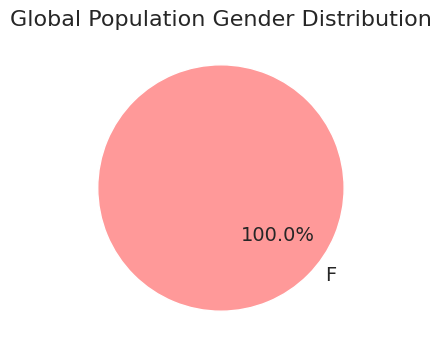

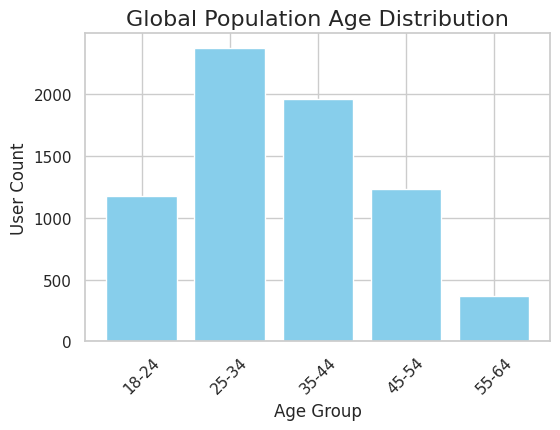

In [5]:
# style
sns.set(style="whitegrid")

# Create a unique df for gender and age group based on hashed_uid
unique_df_temp = df[['studyid', 'gender', 'age_group']].drop_duplicates()


# Gender Distribution: Pie Chart
gender_distribution = unique_df_temp['gender'].value_counts()

# Define custom colors: pink for female, blue for male, gray for unknown
custom_colors = ["#FF9999", "#66B2FF", "#D3D3D3"] 

plt.figure(figsize=(6, 4))
plt.pie(
    gender_distribution, 
    labels=gender_distribution.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=custom_colors, 
    textprops={'fontsize': 14}
)
plt.title('Global Population Gender Distribution', fontsize=16)
plt.show()



age_group_order = ["18-24", "25-34", "35-44", "45-54", "55-64"]

unique_df_temp['age_group'] = pd.Categorical(unique_df_temp['age_group'], categories=age_group_order, ordered=True)

age_distribution = unique_df_temp['age_group'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(age_distribution.index, age_distribution.values, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('User Count')
plt.title('Global Population Age Distribution', fontsize=16)
plt.xticks(rotation=45)
plt.show()


In [6]:
# Function to calculate stats 
def calculate_stats(df, column, group_by):
    
    df[f'{column}_count'] = df[column].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)

   
    grouped_data = df.groupby(group_by)[f'{column}_count']

    
    mean_value = grouped_data.mean()
    std_value = grouped_data.std()


    
    print(f"\n--- {column.capitalize()} Statistics ---")
    print(f"Mean {column} per {group_by}: {mean_value.mean():.2f}")
    print(f"Standard deviation of {column} per {group_by}: {std_value.mean():.2f}")
    
    return mean_value, std_value

# Calculate stats for triggers, reliefs, and affected_activities
columns_to_analyze = ['all_triggers', 'all_relieves', 'all_aff']

for column in columns_to_analyze:
    calculate_stats(df, column, 'studyid')



--- All_triggers Statistics ---
Mean all_triggers per studyid: 3.70
Standard deviation of all_triggers per studyid: 1.21

--- All_relieves Statistics ---
Mean all_relieves per studyid: 2.98
Standard deviation of all_relieves per studyid: 1.11

--- All_aff Statistics ---
Mean all_aff per studyid: 2.26
Standard deviation of all_aff per studyid: 0.82


In [7]:
# Function to process and count unique values for a single study id
def process_and_count_per_uid(df, column):

    modes_per_uid = {}

    for uid, group in df.groupby('studyid'):
        # Split entries by comma, strip spaces, and convert to lowercase
        all_values = group[column].str.lower().str.split(',\s*').sum()
        # Count occurrences
        value_counts = Counter(all_values)

        # Find the mode 
        if value_counts:
            mode_item, mode_count = value_counts.most_common(1)[0]
            modes_per_uid[uid] = mode_item
        else:
            
            modes_per_uid[uid] = None

    return modes_per_uid

# Function to find the overall mode of the modes
def find_overall_mode(modes_dict):
    mode_counter = Counter(modes_dict.values())
    mode_counter.pop(None, None)
    if mode_counter:
        overall_mode_item, overall_mode_count = mode_counter.most_common(1)[0]
        return overall_mode_item, overall_mode_count
    else:
        return None, 0

# Calculate modes for triggers, reliefs, and affected_activities
columns_to_analyze = ['all_triggers', 'all_relieves', 'all_aff']

for column in columns_to_analyze:
    print(f"\n--- Mode per study id for {column} ---")
    modes = process_and_count_per_uid(df, column)

    for uid, mode_item in modes.items():
        print(f"Study id: {uid}, Mode: {mode_item}")

    overall_mode_item, overall_mode_count = find_overall_mode(modes)
    print(f"Overall Mode of Modes for {column}: {overall_mode_item} ({overall_mode_count} occurrences)")



--- Mode per study id for all_triggers ---
Stidy id: 00018e9fba5d3a9c0955d9d314300c53753b2c80, Mode: menstrualcyclestatus:no
Stidy id: 000627f4b55415dbe41189b1312806a875bf5925, Mode: very variable weather
Stidy id: 000913c174eb8903a6841691ea4551f5a8f6a84c, Mode: menstrualcyclestatus:yes
Stidy id: 0011aa97a1511bff37c12caffcc5c723364af76e, Mode: menstrualcyclestatus:no
Stidy id: 002317577788a17e6cbf392caa8d11299975cb52, Mode: stress
Stidy id: 003302dc9b5b480b268b55f81fc065e5177a078a, Mode: menstrualcyclestatus:yes
Stidy id: 0034e94a5b1e0f21c4ee46e0b9d522f5cb33ede3, Mode: estrés
Stidy id: 00382c9646433e33403c8550d9d77a8739be650e, Mode: sinus
Stidy id: 0040c0ba28445d1819fcfc35db6d4ad397eabb0b, Mode: menstrualcyclestatus:no
Stidy id: 00413ad7896e12a4f7686e718e68c82fa6331218, Mode: anxiety
Stidy id: 004d1ecd38f73f1c3ec575664cad0d617d83baa6, Mode: inactivity
Stidy id: 005253317014a0e46c6a3749291d7f9694b1bdb0, Mode: wetterumschwünge
Stidy id: 0056fd283cf617b8d548e0f0a7e5f89d69868326, Mode: st

In [8]:
# Function to process and count unique values in the column
def process_and_count(df, column):
    # Split the entries by comma, strip spaces, and convert to lowercase
    all_values = df[column].str.lower().str.split(',\s*').sum() 
    # Count each unique value
    value_counts = Counter(all_values)
    return value_counts

# Dictionaries to store the top 5 most common values
top_5_triggers = {}
top_5_reliefs = {}
top_5_affected_activities = {}
top_5_locations = {}

for col, storage_dict in zip(['all_triggers', 'all_relieves', 'all_aff','all_locations'],
                             [top_5_triggers, top_5_reliefs, top_5_affected_activities,top_5_locations]):
    print(f"\n--- {col} ---")
    counts = process_and_count(df, col)
    
    # Store top 5 most common values in the dictionary
    top_5_items = counts.most_common(5)
    for item, count in top_5_items:
        storage_dict[item] = count
        print(f"{item}: {count}")       
    
    print(f"Number of unique {col}: {len(counts)}")




--- all_triggers ---
menstrualcyclestatus:no: 7473
stress: 4087
neck pain: 2509
menstrualcyclestatus:yes: 2407
lack of sleep: 2331
Number of unique all_triggers: 2424

--- all_relieves ---
drink water: 4943
sleep: 4504
dark room rest: 3902
food: 3566
caffeine: 3151
Number of unique all_relieves: 1439

--- all_aff ---
slower [at home]: 4643
hard to concentrate: 3812
slower [at work]: 2885
woke up during sleep: 1798
no screen / phone: 1602
Number of unique all_aff: 933

--- all_locations ---
home: 3422
bed (at home): 2893
work: 2029
out: 727
in transit/commuting: 475
Number of unique all_locations: 352


/tmp/ipykernel_465062/2563224900.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_5_triggers.values()), y=list(top_5_triggers.keys()), palette=triggers_palette)


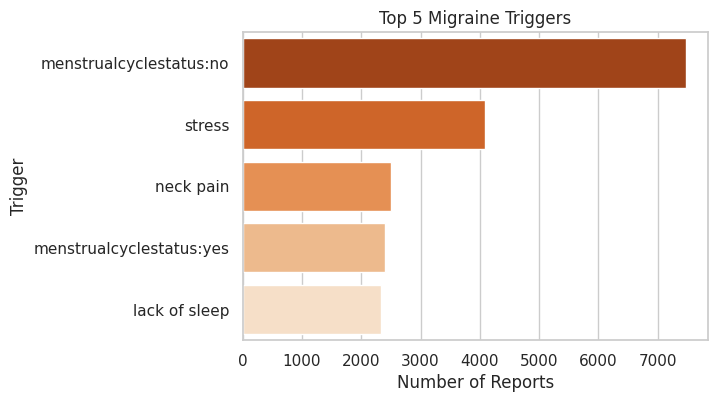

/tmp/ipykernel_465062/2563224900.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_5_reliefs.values()), y=list(top_5_reliefs.keys()), palette=reliefs_palette)


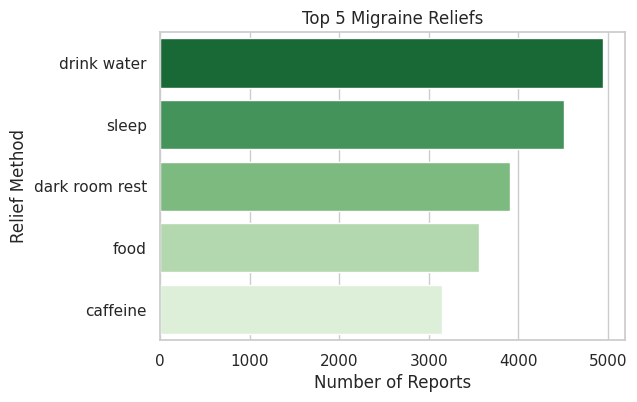

/tmp/ipykernel_465062/2563224900.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_5_affected_activities.values()), y=list(top_5_affected_activities.keys()), palette=activities_palette)


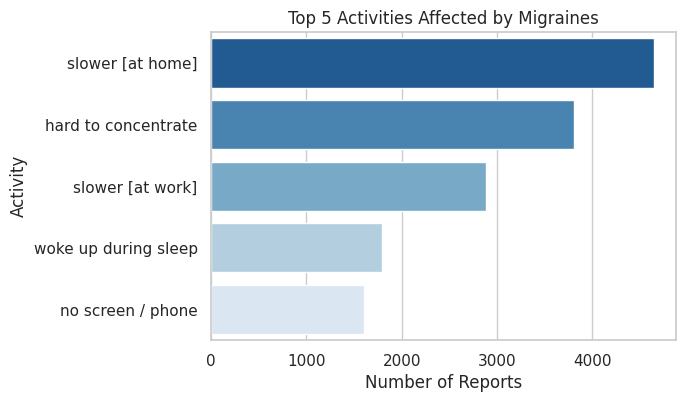

/tmp/ipykernel_465062/2563224900.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_5_locations.values()), y=list(top_5_locations.keys()), palette=locations_palatte)


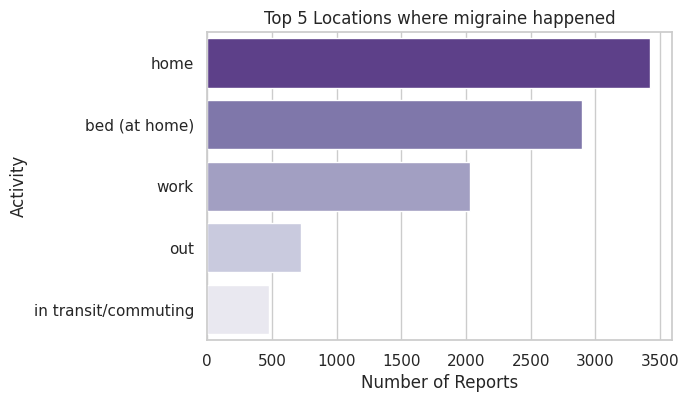

In [18]:
# Triggers: Bar Plot for Top 5 Triggers
plt.figure(figsize=(6, 4))
triggers_palette = sns.color_palette("Oranges", len(top_5_triggers))[::-1] 
sns.barplot(x=list(top_5_triggers.values()), y=list(top_5_triggers.keys()), palette=triggers_palette)
plt.title('Top 5 Migraine Triggers')
plt.xlabel('Number of Reports')
plt.ylabel('Trigger')
plt.show()

# Reliefs: Bar Plot for Top 5 Reliefs
plt.figure(figsize=(6, 4))
reliefs_palette = sns.color_palette("Greens", len(top_5_reliefs))[::-1]  
sns.barplot(x=list(top_5_reliefs.values()), y=list(top_5_reliefs.keys()), palette=reliefs_palette)
plt.title('Top 5 Migraine Reliefs')
plt.xlabel('Number of Reports')
plt.ylabel('Relief Method')
plt.show()

# Activities Affected: Bar Plot for Top 5 Affected Activities
plt.figure(figsize=(6, 4))
activities_palette = sns.color_palette("Blues", len(top_5_affected_activities))[::-1] 
sns.barplot(x=list(top_5_affected_activities.values()), y=list(top_5_affected_activities.keys()), palette=activities_palette)
plt.title('Top 5 Activities Affected by Migraines')
plt.xlabel('Number of Reports')
plt.ylabel('Activity')
plt.show()


# Location where migraine happened: Bar Plot for Top 5 Locations
plt.figure(figsize=(6, 4))
locations_palatte= sns.color_palette("Purples", len(top_5_locations))[::-1] 
sns.barplot(x=list(top_5_locations.values()), y=list(top_5_locations.keys()), palette=locations_palatte)
plt.title('Top 5 Locations where migraine happened')
plt.xlabel('Number of Reports')
plt.ylabel('Activity')
plt.show()


/tmp/ipykernel_465062/2473892268.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(x=df['age_group'], y=df['migraine_days_per_month'], palette='Blues')
/tmp/ipykernel_465062/2473892268.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = data.groupby(x_column)[y_column].agg(['mean', 'min', 'max', 'std'])


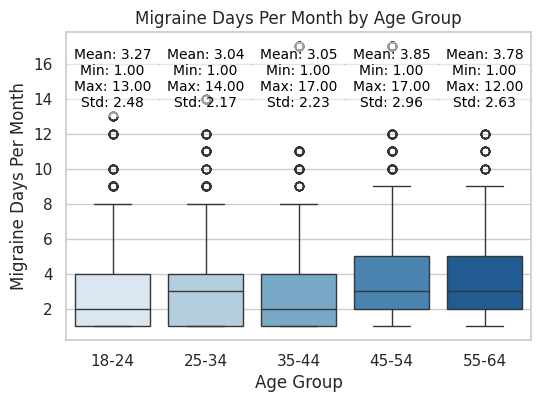

/tmp/ipykernel_465062/2473892268.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(x=df['age_group'], y=df['painintensity'], palette='Purples')
/tmp/ipykernel_465062/2473892268.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = data.groupby(x_column)[y_column].agg(['mean', 'min', 'max', 'std'])


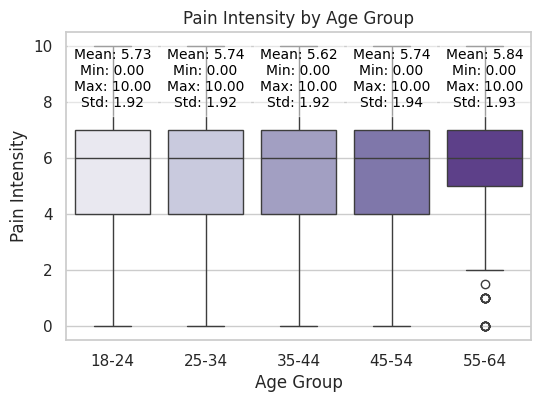

/tmp/ipykernel_465062/2473892268.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.boxplot(x=df['age_group'], y=df['duration_in_hours'], palette='Reds')
/tmp/ipykernel_465062/2473892268.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = data.groupby(x_column)[y_column].agg(['mean', 'min', 'max', 'std'])


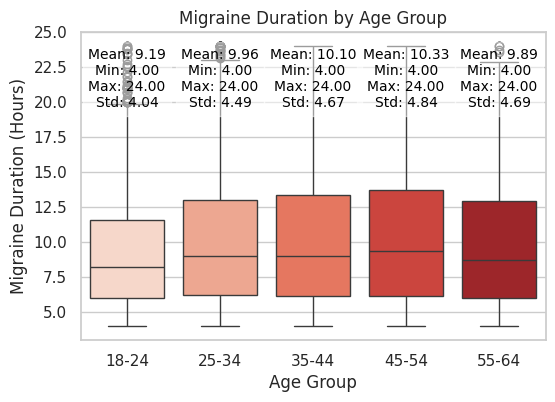

In [10]:
age_group_order = ["18-24", "25-34", "35-44", "45-54", "55-64"]

df['age_group'] = pd.Categorical(df['age_group'], categories=age_group_order, ordered=True)

def add_stats(ax, data, x_column, y_column):
    grouped_stats = data.groupby(x_column)[y_column].agg(['mean', 'min', 'max', 'std'])
    for i, (index, row) in enumerate(grouped_stats.iterrows()):
        ax.text(
            i, 
            ax.get_ylim()[1] - 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]), 
            f'Mean: {row["mean"]:.2f}\nMin: {row["min"]:.2f}\nMax: {row["max"]:.2f}\nStd: {row["std"]:.2f}', 
            ha='center', 
            va='top', 
            color='black', 
            fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.5)
        )

# Boxplot for migraine_days_per_month by age_group
plt.figure(figsize=(6, 4))
ax1 = sns.boxplot(x=df['age_group'], y=df['migraine_days_per_month'], palette='Blues')
add_stats(ax1, df, 'age_group', 'migraine_days_per_month')  
plt.title("Migraine Days Per Month by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Migraine Days Per Month")
plt.show()

# Boxplot for pain_intensity by age_group
plt.figure(figsize=(6, 4))
ax2 = sns.boxplot(x=df['age_group'], y=df['painintensity'], palette='Purples')
add_stats(ax2, df, 'age_group', 'painintensity') 
plt.title("Pain Intensity by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Pain Intensity")
plt.show()

# Boxplot for migraine duration by age_group
plt.figure(figsize=(6, 4))
ax3 = sns.boxplot(x=df['age_group'], y=df['duration_in_hours'], palette='Reds')
add_stats(ax3, df, 'age_group', 'duration_in_hours') 
plt.title("Migraine Duration by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Migraine Duration (Hours)")
plt.show()


Activity Group Distribution (number of participants):
Sedentary: 7082
Active: 35
Highly Active: 2


/tmp/ipykernel_465062/4118196372.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=groups, palette="coolwarm")


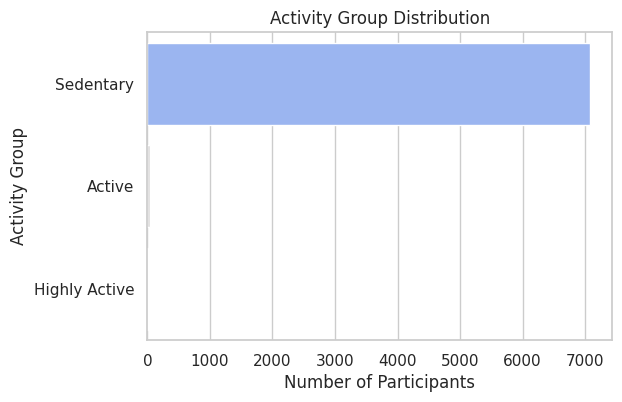

In [11]:
# Activity groups data
activity_group_counts = df.groupby('studyid')['activity_group'].first().value_counts()

# Print the results
print("Activity Group Distribution (number of participants):")
for group, count in activity_group_counts.items():
    print(f"{group}: {count}")

groups = list(activity_group_counts.index)
counts = list(activity_group_counts.values)

# Plot 
plt.figure(figsize=(6, 4))
sns.barplot(x=counts, y=groups, palette="coolwarm")
plt.title('Activity Group Distribution')
plt.xlabel('Number of Participants')
plt.ylabel('Activity Group')
plt.show()


/tmp/ipykernel_465062/3552288986.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(x=df['activity_group'], y=df['migraine_days_per_month'], palette='Blues')


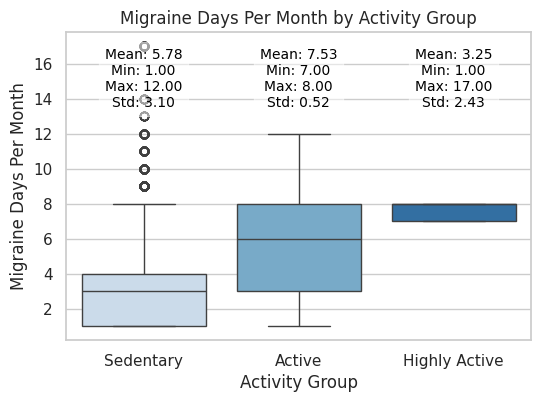

/tmp/ipykernel_465062/3552288986.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(x=df['activity_group'], y=df['painintensity'], palette='Purples')


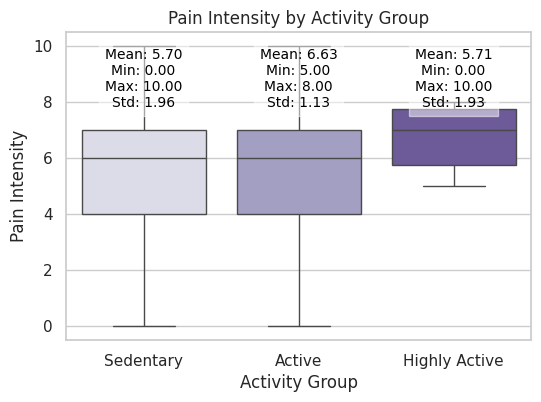

/tmp/ipykernel_465062/3552288986.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.boxplot(x=df['activity_group'], y=df['duration_in_hours'], palette='Reds')


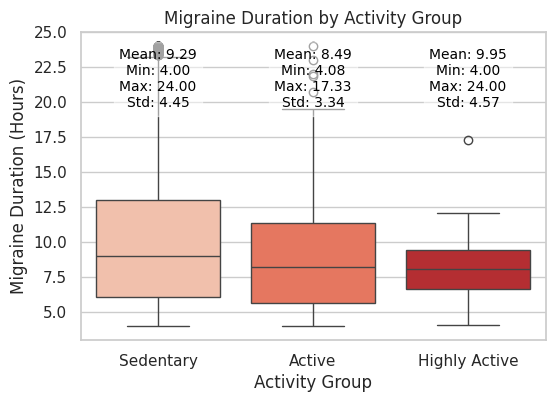

In [12]:
def add_stats(ax, data, x_column, y_column):
    grouped_stats = data.groupby(x_column)[y_column].agg(['mean', 'min', 'max', 'std'])
    for i, (index, row) in enumerate(grouped_stats.iterrows()):
        ax.text(
            i, 
            ax.get_ylim()[1] - 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]), 
            f'Mean: {row["mean"]:.2f}\nMin: {row["min"]:.2f}\nMax: {row["max"]:.2f}\nStd: {row["std"]:.2f}', 
            ha='center', 
            va='top', 
            color='black', 
            fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.5)
        )

# Boxplot for migraine_days_per_month by activity_group
plt.figure(figsize=(6, 4))
ax1 = sns.boxplot(x=df['activity_group'], y=df['migraine_days_per_month'], palette='Blues')
add_stats(ax1, df, 'activity_group', 'migraine_days_per_month')  
plt.title("Migraine Days Per Month by Activity Group")
plt.xlabel("Activity Group")
plt.ylabel("Migraine Days Per Month")
plt.show()

# Boxplot for pain_intensity by activity_group
plt.figure(figsize=(6, 4))
ax2 = sns.boxplot(x=df['activity_group'], y=df['painintensity'], palette='Purples')
add_stats(ax2, df, 'activity_group', 'painintensity')  
plt.title("Pain Intensity by Activity Group")
plt.xlabel("Activity Group")
plt.ylabel("Pain Intensity")
plt.show()

# Boxplot for migraine duration by activity_group
plt.figure(figsize=(6, 4))
ax3 = sns.boxplot(x=df['activity_group'], y=df['duration_in_hours'], palette='Reds')
add_stats(ax3, df, 'activity_group', 'duration_in_hours')  
plt.title("Migraine Duration by Activity Group")
plt.xlabel("Activity Group")
plt.ylabel("Migraine Duration (Hours)")
plt.show()


/tmp/ipykernel_465062/2582036395.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=groups, palette=colors)


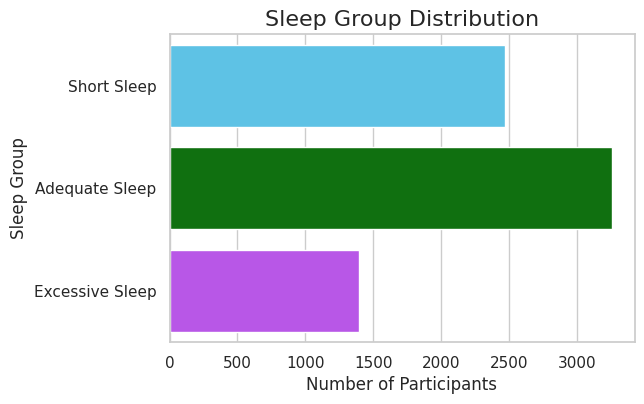

In [13]:
activity_group_counts = df.groupby('studyid')['sleep_group'].first().value_counts()

activity_group_counts_df = activity_group_counts.reset_index()
activity_group_counts_df.columns = ['sleep_group', 'count']

activity_group_order = ['Short Sleep', 'Adequate Sleep', 'Excessive Sleep']
activity_group_counts_df['sleep_group'] = pd.Categorical(
    activity_group_counts_df['sleep_group'], 
    categories=activity_group_order, 
    ordered=True
)
activity_group_counts_df = activity_group_counts_df.sort_values('sleep_group')

groups = activity_group_counts_df['sleep_group'].tolist()
counts = activity_group_counts_df['count'].tolist()

colors = []
for group in groups:
    if group == 'Short Sleep':
        colors.append('#47cdfc')
    elif group == 'Adequate Sleep':
        colors.append('green')
    else: 
        colors.append(sns.color_palette('cool', len(groups))[groups.index(group)])

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=counts, y=groups, palette=colors)
plt.title('Sleep Group Distribution', fontsize=16)
plt.xlabel('Number of Participants', fontsize=12)
plt.ylabel('Sleep Group', fontsize=12)
plt.show()


/tmp/ipykernel_465062/1059612661.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(


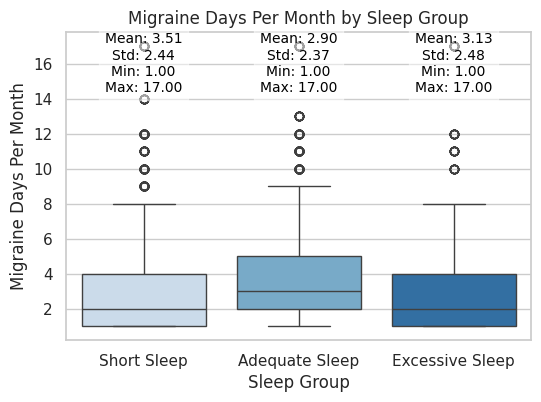

/tmp/ipykernel_465062/1059612661.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(


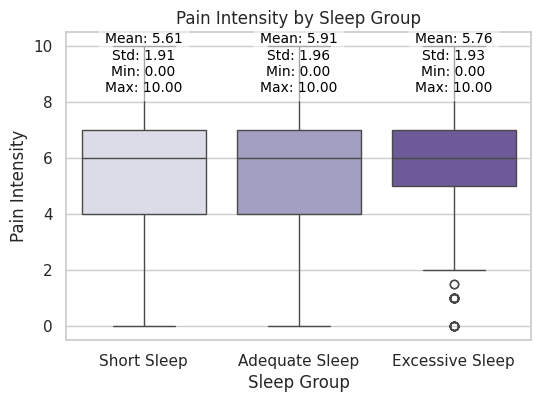

/tmp/ipykernel_465062/1059612661.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.boxplot(


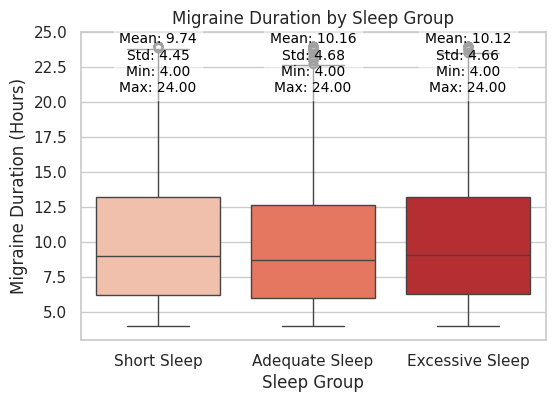

In [14]:
def add_stats(ax, data, x_column, y_column):
    grouped_stats = data.groupby(x_column)[y_column].agg(['mean', 'std', 'min', 'max'])
    for i, (index, row) in enumerate(grouped_stats.iterrows()):
        ax.text(
            i, 
            ax.get_ylim()[1], 
            f'Mean: {row["mean"]:.2f}\nStd: {row["std"]:.2f}\nMin: {row["min"]:.2f}\nMax: {row["max"]:.2f}', 
            ha='center', va='top', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.5)
        )

sleep_order = ['Short Sleep', 'Adequate Sleep', 'Excessive Sleep']

# Boxplot for migraine_days_per_month by sleep_group
plt.figure(figsize=(6, 4))
ax1 = sns.boxplot(
    x=pd.Categorical(df['sleep_group'], categories=sleep_order, ordered=True), 
    y=df['migraine_days_per_month'], 
    palette='Blues'
)
add_stats(ax1, df, 'sleep_group', 'migraine_days_per_month') 
plt.title("Migraine Days Per Month by Sleep Group")
plt.xlabel("Sleep Group")
plt.ylabel("Migraine Days Per Month")
plt.show()

# Boxplot for pain_intensity by sleep_group
plt.figure(figsize=(6, 4))
ax2 = sns.boxplot(
    x=pd.Categorical(df['sleep_group'], categories=sleep_order, ordered=True), 
    y=df['painintensity'], 
    palette='Purples'
)
add_stats(ax2, df, 'sleep_group', 'painintensity')  
plt.title("Pain Intensity by Sleep Group")
plt.xlabel("Sleep Group")
plt.ylabel("Pain Intensity")
plt.show()

# Boxplot for migraine duration by sleep_group
plt.figure(figsize=(6, 4))
ax3 = sns.boxplot(
    x=pd.Categorical(df['sleep_group'], categories=sleep_order, ordered=True), 
    y=df['duration_in_hours'], 
    palette='Reds'
)
add_stats(ax3, df, 'sleep_group', 'duration_in_hours') 
plt.title("Migraine Duration by Sleep Group")
plt.xlabel("Sleep Group")
plt.ylabel("Migraine Duration (Hours)")
plt.show()


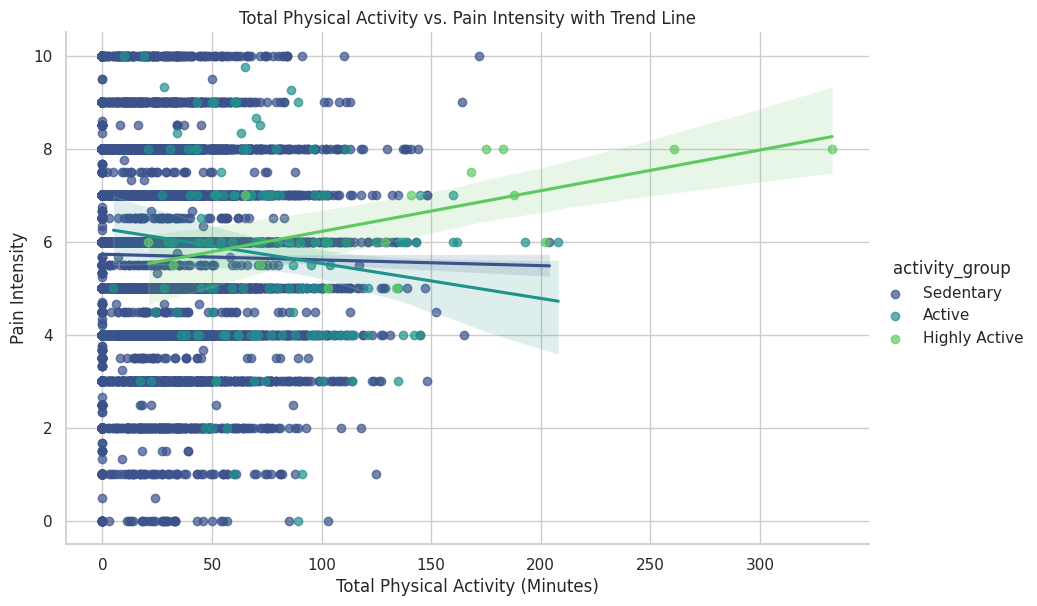

In [15]:
# relationship between total minutes of activity and pain intensity and trend lines in every activity group
# note: in the short dataset, pain intensity values are floats(1 to 10) thats why there are points between the integer numbers on y axis.
sns.lmplot(data=df, x='total_physical_activity', y='painintensity', hue='activity_group', 
           palette='viridis', markers='o', scatter_kws={'alpha': 0.7}, height=6, aspect=1.5)
plt.title("Total Physical Activity vs. Pain Intensity with Trend Line")
plt.xlabel("Total Physical Activity (Minutes)")
plt.ylabel("Pain Intensity")
plt.show()

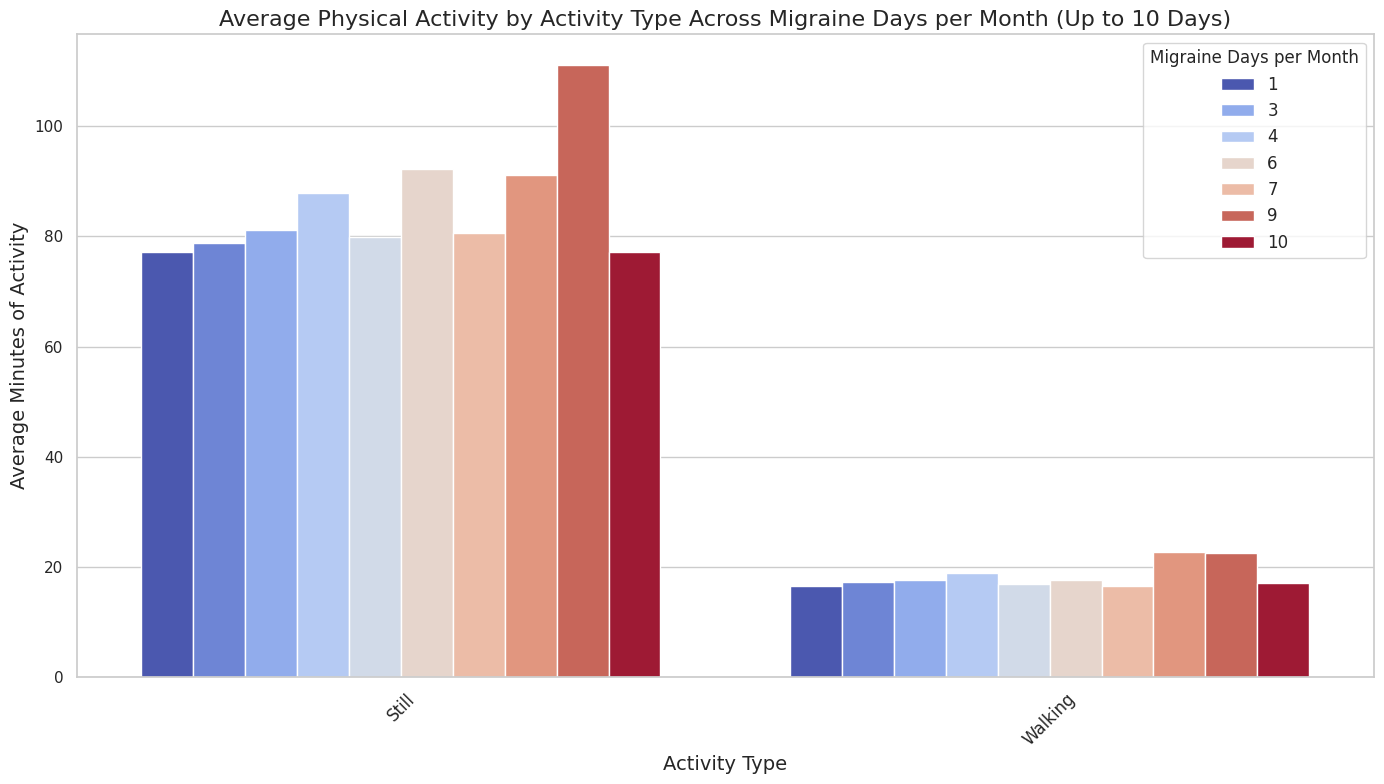

In [17]:
# The bars in the plot represent the average minutes of a given activity type (either ua_walking or ua_still) for individuals grouped by the number of migraine days per month.

sns.set(style="whitegrid")

# Filter the dataset to include rows where migraine_days_per_month is less than or equal to 10
filtered_df = df[df['migraine_days_per_month'] <= 10]

# Columns containing physical activity data
activity_cols = ['ua_walking', 'ua_still']

melted_dataset = filtered_df.melt(id_vars=['migraine_days_per_month'], value_vars=activity_cols, 
                                  var_name='Activity Type', value_name='Minutes')

melted_dataset['Activity Type'] = melted_dataset['Activity Type'].replace({
    'ua_walking': 'Walking',
    'ua_still': 'Still'
})

# Aggregating data to calculate the average minutes of activity type across different migraine days
aggregated_data = melted_dataset.groupby(['Activity Type', 'migraine_days_per_month']).agg({'Minutes': 'mean'}).reset_index()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=aggregated_data, x='Activity Type', y='Minutes', hue='migraine_days_per_month', palette='coolwarm')

plt.title("Average Physical Activity by Activity Type Across Migraine Days per Month (Up to 10 Days)", fontsize=16)
plt.xlabel("Activity Type", fontsize=14)
plt.ylabel("Average Minutes of Activity", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Migraine Days per Month', fontsize=12)
plt.tight_layout()
plt.show()

